## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on=['Mouse ID'])

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = merged_data['Mouse ID'].value_counts()
total_mice = len(num_of_mice)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ids =pd.DataFrame(duplicates)
duplicate_ids


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data = clean_df["Mouse ID"].value_counts()
clean_total = len(clean_data)
clean_total

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#drug_mean.head()
drug_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#drug_median
drug_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#drug_variance
drug_std_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#drug_std_dev
drug_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#drug_sem



In [8]:
# Assemble the resulting series into a single summary dataframe.
tumor_summary = pd.DataFrame({'Mean': drug_mean, 
                             'Median' : drug_median, 
                             'Variance' : drug_variance, 'Std Dev' : drug_std_dev,
                             'SEM' : drug_sem
                            })
tumor_summary

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_stats = clean_df.groupby('Drug Regimen')
#agg_stats.head()
tumor_summary_2 = agg_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
tumor_summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

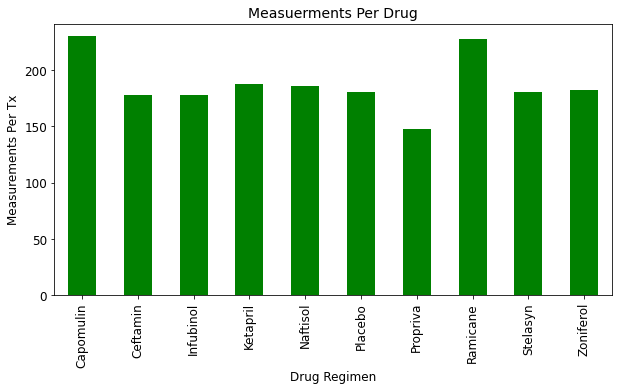

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements_per_tx = clean_df.groupby(['Drug Regimen']).count()['Timepoint']
#measurements_per_tx
plot_pandas = measurements_per_tx.plot.bar(figsize = (10,5), color = 'g', fontsize = 12)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Measurements Per Tx", fontsize = 12)
plt.title ("Measuerments Per Drug", fontsize = 14)
plt.show


Text(0, 0.5, 'Number of Tumor Measurements')

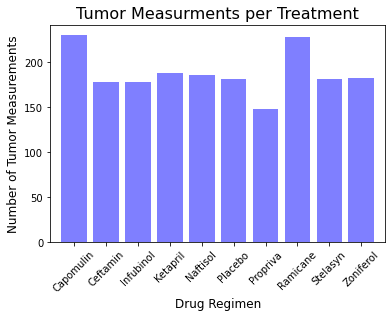

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x = ['Capomulin','Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
y = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

plt.bar(x,y, color= 'b', alpha=0.5, align='center' )
plt.xlim(-0.75, len(x)-0.25)
plt.ylim=(0, max(y)*1.1)

ticks = [value for value in x]
plt.xticks(x,['Capomulin',
           'Ceftamin', 
           'Infubinol', 
           'Ketapril', 
           'Naftisol', 
           'Placebo', 
           'Propriva', 
           'Ramicane', 
           'Stelasyn', 
           'Zoniferol'], rotation= '45')

plt.title("Tumor Measurments per Treatment", fontsize = 16)
plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("Number of Tumor Measurements", fontsize = 12)




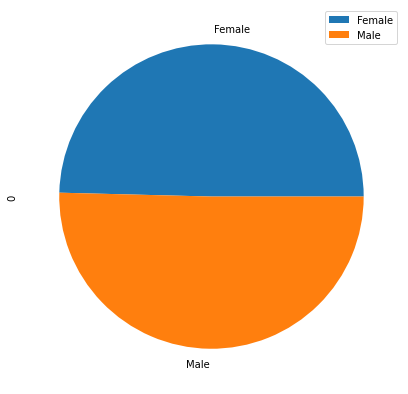

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_stats = clean_df.groupby(['Mouse ID', 'Sex'])
gender_df = pd.DataFrame(gender_stats.size())

gender_totals = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_totals[0]

plot = gender_totals.plot.pie(y=0, figsize=(7,7))


<function matplotlib.pyplot.show(close=None, block=None)>

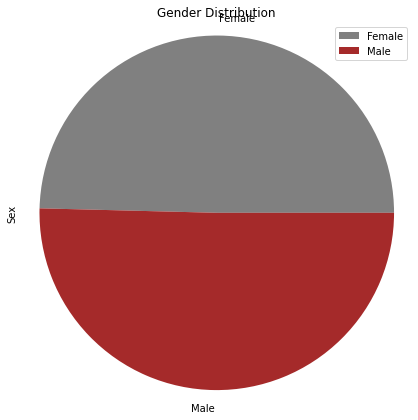

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_totals
gender_totals.columns = ['Total Count']

colors = ['grey', 'brown']
plot = gender_totals.plot.pie(y='Total Count', figsize= (7,7), colors = colors)

plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.axis('equal')
plt.show

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse
cap_max = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
cap_max_df = pd.DataFrame(cap_max)
#cap_max_df

ram_max = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
ram_max_df = pd.DataFrame(ram_max)

inf_max = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
inf_max_df = pd.DataFrame(inf_max)

cef_max = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
cef_max_df = pd.DataFrame(cef_max)
cef_max_df

# Merge with original DF
cap_max_merge = pd.merge(cap_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
ram_max_merge = pd.merge(ram_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
inf_max_merge = pd.merge(inf_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")
cef_max_merge = pd.merge(cef_max_df,clean_df,on=("Mouse ID","Timepoint"),how="left")

cef_max_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
tx = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin' ]

# Create empty list to fill with tumor vol data (for plotting)
tum_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
